<a href="https://colab.research.google.com/github/leonayiu/Apple-App-Store-Games/blob/master/Copy_of_final_project_data_gathering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

pixel converter from jpg

In [0]:
from PIL import Image
import requests
from io import BytesIO
from collections import Counter

test on one icon image

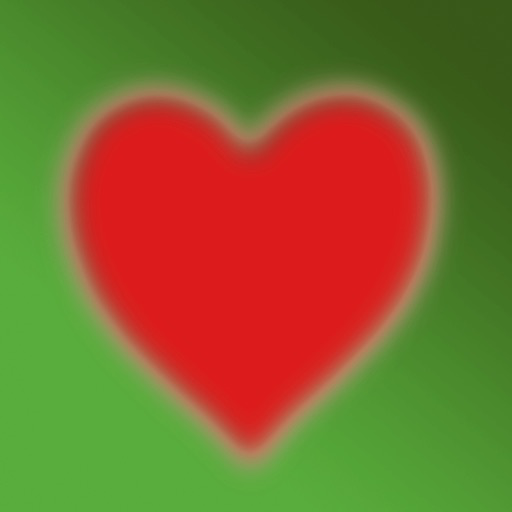

In [3]:
url = 'https://is3-ssl.mzstatic.com/image/thumb/Purple128/v4/44/21/9d/44219d29-94e1-3ccd-59dc-ab9c81b8b18a/source/512x512bb.jpg'
response = requests.get(url)
img = Image.open(BytesIO(response.content),'r')
img


convert the image to 512x512 pixels with color code

In [4]:
pix_val_test = list(img.getdata())
pix_val_test

[(74, 138, 44),
 (74, 138, 44),
 (74, 138, 44),
 (74, 138, 44),
 (74, 138, 44),
 (73, 137, 43),
 (73, 137, 43),
 (72, 136, 42),
 (71, 135, 41),
 (71, 135, 41),
 (72, 136, 42),
 (72, 136, 42),
 (72, 136, 42),
 (72, 136, 42),
 (72, 136, 42),
 (72, 136, 42),
 (71, 136, 42),
 (71, 135, 41),
 (70, 134, 40),
 (70, 134, 40),
 (72, 136, 42),
 (72, 136, 42),
 (71, 135, 41),
 (70, 133, 42),
 (72, 132, 42),
 (72, 132, 42),
 (72, 132, 42),
 (72, 132, 42),
 (72, 132, 42),
 (73, 132, 42),
 (73, 132, 42),
 (73, 132, 42),
 (72, 132, 42),
 (73, 132, 42),
 (73, 132, 42),
 (72, 131, 41),
 (72, 131, 41),
 (72, 131, 41),
 (72, 131, 41),
 (72, 131, 41),
 (72, 131, 41),
 (72, 131, 41),
 (72, 131, 41),
 (72, 131, 41),
 (72, 131, 41),
 (72, 131, 41),
 (72, 131, 41),
 (72, 131, 41),
 (71, 130, 40),
 (71, 130, 40),
 (71, 130, 40),
 (71, 130, 40),
 (70, 129, 39),
 (70, 129, 39),
 (70, 129, 39),
 (70, 129, 39),
 (70, 129, 39),
 (70, 129, 39),
 (70, 129, 39),
 (70, 129, 39),
 (70, 129, 39),
 (70, 129, 39),
 (70, 12



define the function to convert 512x512 pixels in a icon jpg into 512x512 strings of 3 color code (RGB)
define 3 features:
*   hpercent_c_cnt: count of color that taking more than 10% of the full image
*   lpercent_c_cnt: count of color that taking less than 0.1% of the full image
*   max_c_cnt: count of pixels that the most often color 










In [0]:


def cnt_pix(url):
  response = requests.get(url)
  img = Image.open(BytesIO(response.content),'r')
  pix_val = list(img.getdata())
  lstpix=[]

  for spix in pix_val:
    pix='' 
    if type(spix)==int:
      lstpix.append(spix)
    else:  
      for num,cc in enumerate(spix):
        if num != len(spix)-1:
          pix=pix+str(cc)+','
        else:
          pix=pix+str(cc)
      lstpix.append(pix)

  cntpix=Counter(lstpix)

  hpercent_c_cnt=0
  lpercent_c_cnt=0
  for i in cntpix:
    if cntpix[i]>512*512*0.1:
      hpercent_c_cnt+=1
    if cntpix[i]<512*512*0.001:
      lpercent_c_cnt+=1
  max_c_cnt=cntpix.most_common()[0][1]
  return hpercent_c_cnt,lpercent_c_cnt,max_c_cnt


import the input file (csv) with 17k apps and its icon image url

In [6]:
import pandas as pd
import numpy as np

from google.colab import files
df = files.upload()
#df=pd.read_csv('/content/appstore_games.csv')

run the function on the column 'Icon URL' in the input table df

In [0]:
cntpix_col=[]
abc=0
for url in df['Icon URL']:
  cntpix_col.append(cnt_pix(url))
  abc=abc+1
  print(abc)
cntpix_data=np.array(cntpix_col)
cntpix_dataset = pd.DataFrame({'hpercent_c_cnt': cntpix_data[:, 0], 'lpercent_c_cnt': cntpix_data[:, 1],'max_c_cnt': cntpix_data[:, 2] })

adding the output 3 new features based on the image color info to the original table

In [0]:
df_new=pandas.concat([df, cntpix_dataset],axis=1)

export to csv

In [0]:
df_new.to_csv(index=False,path_or_buf='/content/new_dataset.csv')